#### Import Packages

In [1]:
import pandas as pd
import pickle
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

from openai import OpenAI
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

from utils.system import *
from class_data.data import Data
from class_generate.gen_index import GenIndex
from class_eval.eval_index import EvalIndex

import warnings
warnings.filterwarnings('ignore')

#### Load Data

In [2]:
# Load openai embeddings
wsj_openai = Data(folder_path=get_format_data() / 'openai', file_pattern='wsj_emb_openai_*')
wsj_openai = wsj_openai.concat_files()

In [3]:
# Load articles
wsj_art = Data(folder_path=get_format_data() / 'token', file_pattern='wsj_tokens_*')
wsj_art = wsj_art.concat_files()

#### Embedding Plot

In [4]:
def exec_plot(data, names, output):
    plt.figure(figsize=(10, 5))
    colors = ['blue', 'red', 'green', 'purple', 'orange', 'cyan', 'magenta', 'yellow', 'black', 'grey']
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1.3)
    for i, (column, name) in enumerate(zip(data.columns, names)):
        plt.plot(data.index, data[column], label=f"{name} Index", color=colors[i % len(colors)])
    plt.legend(fontsize='medium', prop={'weight': 'semibold'}, loc='upper left')
    plt.ylabel("Attention Index", color='black', fontweight='semibold', fontsize=12, labelpad=15)  
    plt.xlabel("", color='black', fontweight='semibold', fontsize=12, labelpad=15) 
    plt.xticks(color='black', fontweight='semibold')
    plt.tick_params(axis='x', which='major', direction='out', length=5, width=1.3, colors='black', labelsize=10, pad=5)
    plt.tick_params(axis='y', which='both', left=False, labelleft=False, pad=10)
    plt.grid(False)
    plt.savefig(f'../../plot/{output}.jpg', format='jpg', dpi=300, bbox_inches='tight')
    plt.show()

In [5]:
%matplotlib inline

In [6]:
# Params
type = 'embedding'
vector_column = 'ada_embedding'
interval = 'M'
art_col = 'body_txt'
eval_col = 'eval'

Here is the query: 
{'label': 'environmental conservation practices in corporations, green finance, socially responsible investing, corporate governance protocols, business ethics and human rights policies in companies, ESG risk assessment strategies, Impact of ESG metrics on stock performance,Sustainable development goals (SDGs),ESG compliance and regulation standards ,Integration of ESG data into investment decisions,Diversity and inclusion impacts on corporate performances ,Climate change considerations in business sectors', 'start_date': '1984-01-01', 'end_date': '2021-12-31'}
------------------------------------------------------------
Getting query vector...
------------------------------------------------------------
Computing cosine similarity with label embedding...


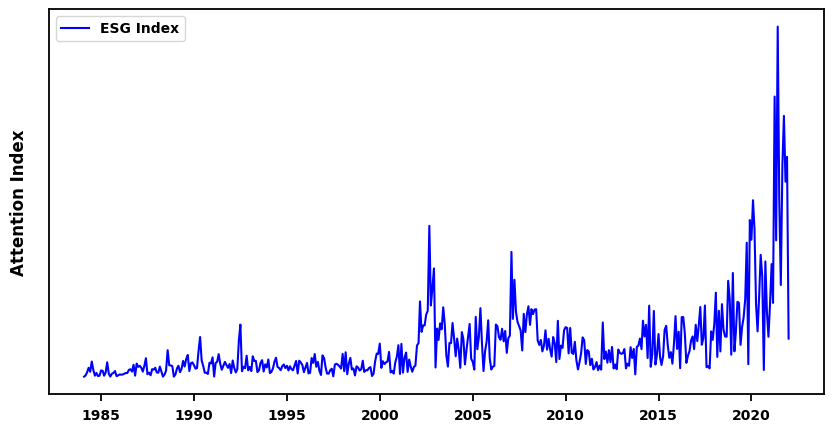

In [34]:
query = 'Generate an index with label ESG from January 1st, 1984, to December 31st, 2021.'
generate = GenIndex(query=query, 
                    type=type, 
                    vector_data=wsj_openai, 
                    vector_column=vector_column, 
                    article_data=wsj_art, 
                    interval=interval, 
                    threshold=0.77,
                    alpha=0)
esg = generate.generate_emb()
# eval_index = EvalIndex(index=esg, label=generate.query['label'], art_col=art_col, eval_col=eval_col, batch_size=1)
# eval_esg = eval_index.eval_articles()
# eval_index.count(eval_esg)
# eval_esg.to_parquet(get_format_data() / 'eval' / 'eval_esg.parquet.brotli', compression='brotli')
exec_plot(esg[['score']], ['ESG'], 'esg_index')

In [50]:
check = eval_esg.loc[(eval_esg.index >= '2002-01-01') & (eval_esg.index <= '2004-01-01')]
check

,score,headline,body_txt,eval
date,,,,
2002-01-31,0.000112,Deciphering the Black Box --- Many Accounting ...,Just 30 years ago the rules governing corporat...,3
2002-02-28,0.000244,Capital: When Standards Are Unacceptable ---- ...,WHEN LAWRENCE SUMMERS spoke from his U.S. Trea...,4
2002-03-31,0.000182,Enron Fuels Accounting Debate in EU --- Yet Ch...,The debacle at Enron Corp. is giving the Europ...,4
2002-04-30,0.000120,Resolutions on Global Warming Are Rising ---- ...,WASHINGTON More investor activists are target...,5
2002-05-31,0.000124,Deals & Deal Makers: SEC Proposes Rules to Imp...,WASHINGTON Expressing frustration with the fa...,3
2002-06-30,0.000237,An Agenda for Corporate Reform ---- By Felix G...,As scandals from Merrill Lynch to Andersen and...,5
2002-07-31,0.000353,Battle of the Accountants: Europe Tries to Win...,BRUSSELS As accounting misdeeds mount in the ...,2
2002-08-31,0.000371,Manager's Journal: Recycling Corporate Respons...,IN RECENT YEARS business ethics has become a c...,5
2002-09-30,0.000210,Global Panel Targets Executive Pay ---- By Sar...,LONDON International shareholders are crackin...,5


In [54]:
check.loc[check.index == '2002-04-30']['body_txt'][0]

'WASHINGTON  More investor activists are targeting global warming as an issue requiring shareholder attention this year. A total of 18 resolutions have been filed so far in 2002 by shareholders focused on their companies involvement in climate change about twice as many in any previous year of an eightyear campaign mounted by activists. Just seven such proposals were filed in 2001 making it the fastestgrowing category tracked by the Investor Responsibility Research Center and the Social Investment Forum which released the data last week. Most resolutions ask corporations to disclose estimated greenhouse gas emissions from their operations as well as the products they make and ask for an assessment of the costs of reducing those levels. Shareholder resolutions are included in annual proxy materials sent out to investors in publicly traded companies who are asked to vote on the issues. The resolutions are almost always opposed by management and rarely pass because of the large number of 

Here is the query: 
{'label': "United States Economic Policy Uncertainty, US Fiscal Policy Changes, Global Effects of US Economic Policies, Government's Role in Economies, Trade Policies Impact on Economic Uncertainty, Technological Influence on US Economic Policies, Monetary Policy Adjustments and Uncertainty, Financial Market Volatility under Economic Uncertainty, Sectoral Shifts due to Economic Policymaking in the US, Response to Financial Crises and Policy Changes , Pandemic’s Impact on United States Economy and Policies , Environmental Sustainability and its Influence on US Economic Policies", 'start_date': '1984-01-01', 'end_date': '2021-12-31'}
------------------------------------------------------------
Getting query vector...
------------------------------------------------------------
Computing cosine similarity with label embedding...
------------------------------------------------------------
Pearson Correlation with EPU: 0.7854543279362516


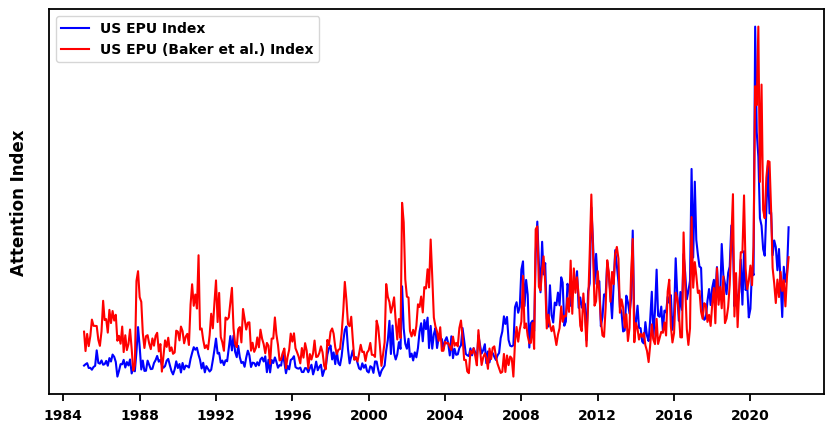

In [11]:
query = 'Generate an index with label United States Economic Policy Uncertainty from January 1st, 1984, to December 31st, 2021.'
generate = GenIndex(query=query, 
                    type=type, 
                    vector_data=wsj_openai, 
                    vector_column=vector_column, 
                    article_data=wsj_art, 
                    interval=interval, 
                    threshold=0.77,
                    alpha=0)
epu = generate.generate_emb()
epu_official = pd.read_parquet(get_format_data() / 'epu.parquet.brotli')
epu = epu.join(epu_official).dropna()
scaler = MinMaxScaler(feature_range=(0, 1))
data_to_scale = epu[['score', 'epu']]
scaled_data = scaler.fit_transform(data_to_scale)
epu[['score', 'epu']] = scaled_data
print("-"*60)
pearson_corr = epu['score'].corr(epu['epu'], method='pearson')
print(f"Pearson Correlation with EPU: {pearson_corr}")
exec_plot(epu[['score', 'epu']], ['US EPU', 'US EPU (Baker et al.)'], 'usepu_index')

Here is the query: 
{'label': 'US-China Trade War, Impact on Global Economy, Policy Shifts related to Trade War, Sector-wise Economic Changes in US and China, Influence on Financial Market Volatility, Technological Advancements and the US-China Trade War, Environmental Sustainability amidst US-China Trade Conflict, International Relations due to US-China Economic Tensions , Monetary Policies changes related to Sino-American Tariff Battle, Effect of Trade Practices because of US-China Dispute , Industrial Evolution amid trade disputes between the USA and China', 'start_date': '1984-01-01', 'end_date': '2021-12-31'}
------------------------------------------------------------
Getting query vector...
------------------------------------------------------------
Computing cosine similarity with label embedding...


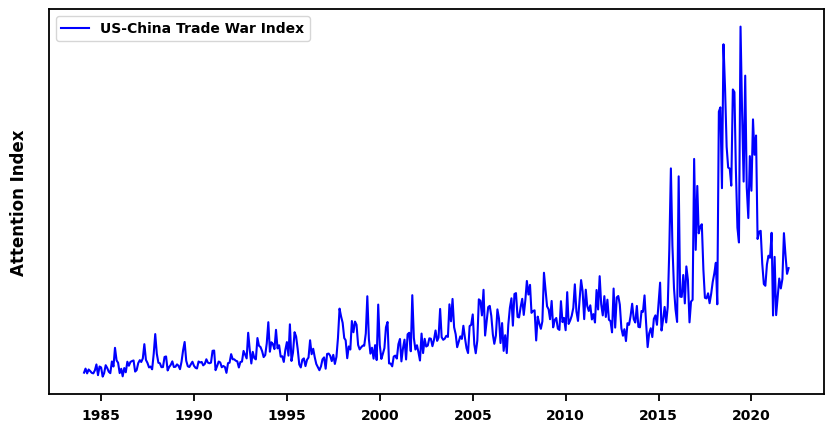

In [19]:
query = 'Generate an index with label US-China Trade War from January 1st, 1984, to December 31st, 2021.'
generate = GenIndex(query=query, 
                    type=type, 
                    vector_data=wsj_openai, 
                    vector_column=vector_column, 
                    article_data=wsj_art, 
                    interval=interval, 
                    threshold=0.77,
                    alpha=0)
trade_war = generate.generate_emb()
exec_plot(trade_war[['score']], ['US-China Trade War'], 'uschinatradewar_index')

Here is the query: 
{'label': "Artificial Intelligence, AI in technology development, Use of AI in industries, Impact of Artificial Intelligence on employment, Ethical implications of AI use, Machine Learning & Deep Learning technologies' role in AI evolution, Pioneers and innovators in artificial intelligence research , Adoption rates& effectiveness of artificial intelligence across sectors , Progress and advancements in Natural Language Processing, Challenges& barriers against wide spread implementation of Artificial Intelligence technologies , Role & influence of governments and international relations on growth and regulation matters pertaining to Artificial Intelligence technology., Latest trends & predictions related to the future deployment of Artificial Intelligent systems", 'start_date': '1984-01-01', 'end_date': '2021-12-31'}
------------------------------------------------------------
Getting query vector...
------------------------------------------------------------
Comput

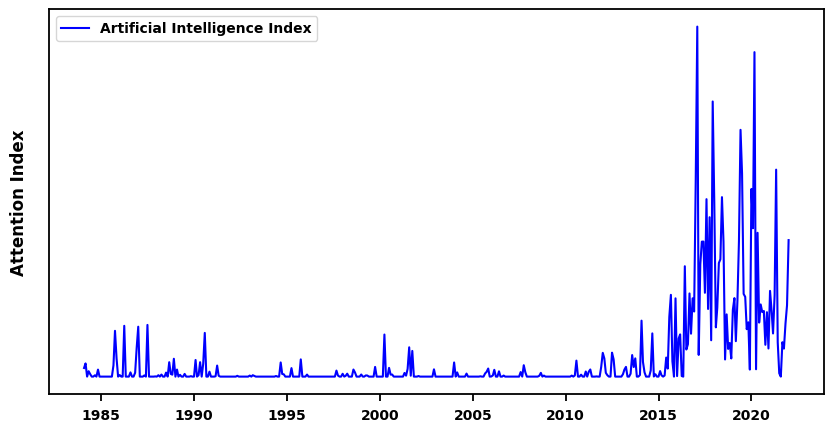

In [23]:
query = 'Generate an index with label Artificial Intelligence from January 1st, 1984, to December 31st, 2021.'
generate = GenIndex(query=query, 
                    type=type, 
                    vector_data=wsj_openai, 
                    vector_column=vector_column, 
                    article_data=wsj_art, 
                    interval=interval, 
                    threshold=0.77,
                    alpha=0)
ai = generate.generate_emb()
exec_plot(ai[['score']], ['Artificial Intelligence'], 'ai_index')

Here is the query: 
{'label': 'Blockchain, Cryptocurrency technology, Distributed ledger technology, Bitcoin and other altcoins, Smart contracts in blockchain, Blockchain in finance and banking, Supply chain uses of blockchain technology, Blockchain cybersecurity implications, Regulatory landscape for blockchain technologies worldwide, Privacy and social issues with blockchain technology applications , Ethical considerations of using the Blockchain Technology ,Blockchain Technology impact on E-commerce ', 'start_date': '1984-01-01', 'end_date': '2021-12-31'}
------------------------------------------------------------
Getting query vector...
------------------------------------------------------------
Computing cosine similarity with label embedding...


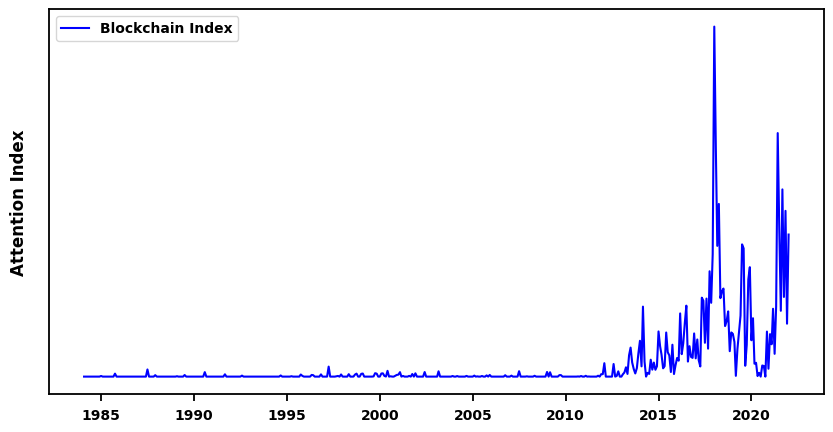

In [26]:
query = 'Generate an index with label Blockchain from January 1st, 1984, to December 31st, 2021.'
generate = GenIndex(query=query, 
                    type=type, 
                    vector_data=wsj_openai, 
                    vector_column=vector_column, 
                    article_data=wsj_art, 
                    interval=interval, 
                    threshold=0.77,
                    alpha=0)
blockchain = generate.generate_emb()
exec_plot(blockchain[['score']], ['Blockchain'], 'blockchain_index')

Here is the query: 
{'label': 'COVID-19 pandemic, Origin of novel coronavirus, Global impact of COVID-19, COVID-19 and public health responses, Vaccine research and development for COVID-19, Government policy responses to the pandemic, Economic impacts of the coronavirus crisis globally and locally, Sector-specific effects of the pandemic (i.e., aviation industry), Technological advancements in response to Covid-19 (teleworking software), The impact on global trade dynamics due to Covid-19 restrictions and measures, Environmental changes observed during the global lockdowns associated with the virus spread , Impact on mental health due to prolonged isolation', 'start_date': '1984-01-01', 'end_date': '2021-12-31'}
------------------------------------------------------------
Getting query vector...
------------------------------------------------------------
Computing cosine similarity with label embedding...


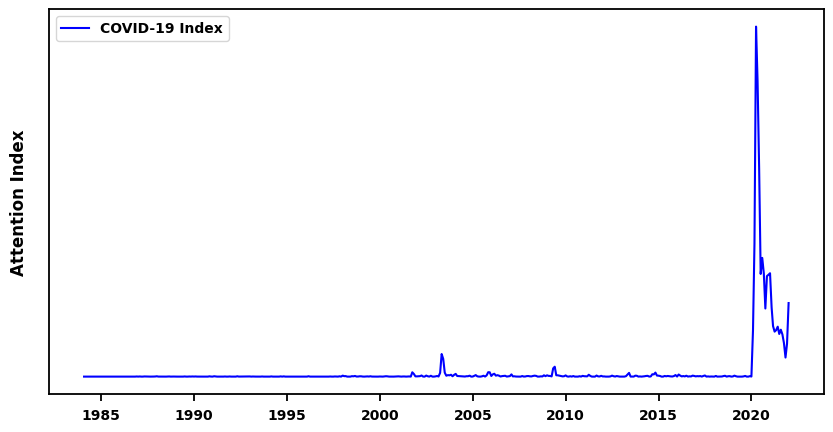

In [28]:
query = 'Generate an index with label COVID-19 from January 1st, 1984, to December 31st, 2021.'
generate = GenIndex(query=query, 
                    type=type, 
                    vector_data=wsj_openai, 
                    vector_column=vector_column, 
                    article_data=wsj_art, 
                    interval=interval, 
                    threshold=0.77,
                    alpha=0)
covid = generate.generate_emb()
exec_plot(covid[['score']], ['COVID-19'], 'covid19_index')

Here is the query: 
{'label': 'Economic Recession, Global Financial Crisis, Economic downturn effects on different sectors, Monetary policy during recession, Government fiscal responses to economic crises, Impact of technology on finance during recession periods, International trade dynamics in an economic downturn, Role of central banks in a crashing economy, Influence of environmental sustainability on economic policies during recessions, Downfall of stock markets and volatility indices during financial depressions, The impact of global pandemic on economies during a crisis period', 'start_date': '1984-01-01', 'end_date': '2021-12-31'}
------------------------------------------------------------
Getting query vector...
------------------------------------------------------------
Computing cosine similarity with label embedding...
------------------------------------------------------------
Pearson Correlation with EPU: 0.7854543279362516


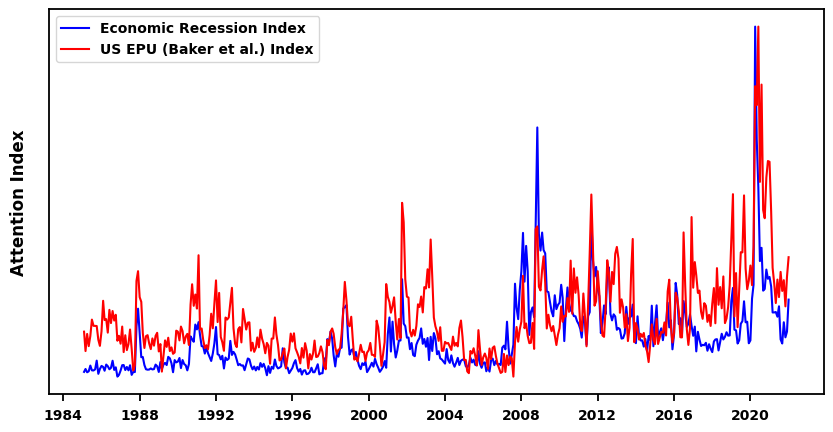

In [29]:
query = 'Generate an index with label Economic Recession from January 1st, 1984, to December 31st, 2021.'
generate = GenIndex(query=query, 
                    type=type, 
                    vector_data=wsj_openai, 
                    vector_column=vector_column, 
                    article_data=wsj_art, 
                    interval=interval, 
                    threshold=0.77,
                    alpha=0)
recess = generate.generate_emb()
epu_official = pd.read_parquet(get_format_data() / 'epu.parquet.brotli')
recess = recess.join(epu_official).dropna()
scaler = MinMaxScaler(feature_range=(0, 1))
data_to_scale = recess[['score', 'epu']]
scaled_data = scaler.fit_transform(data_to_scale)
recess[['score', 'epu']] = scaled_data
print("-"*60)
pearson_corr = recess['score'].corr(recess['epu'], method='pearson')
print(f"Pearson Correlation with EPU: {pearson_corr}")
exec_plot(recess[['score', 'epu']], ['Economic Recession', 'US EPU (Baker et al.)'], 'economicrecession_index')